In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("loan_train.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# Exploratory Data Analysis 
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.shape

(614, 13)

In [6]:
# Checking the datatype of the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Statistical Analysis 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [9]:
#Checking The Distinct Values Present in the columns
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
df = df.dropna()

In [12]:
df["Education"].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [13]:
df["Self_Employed"].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

In [14]:
df["Gender"].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [15]:
df["Property_Area"].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [16]:
df.shape

(480, 13)

In [17]:
df.shape

(480, 13)

In [18]:
df.replace({"Loan_Status":{"Y":1 , "N" :0}},inplace = True)

In [19]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [20]:
# Replacing the 3+ value with the 4 
df["Dependents"].replace("3+",4,inplace=True)

In [21]:
df["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

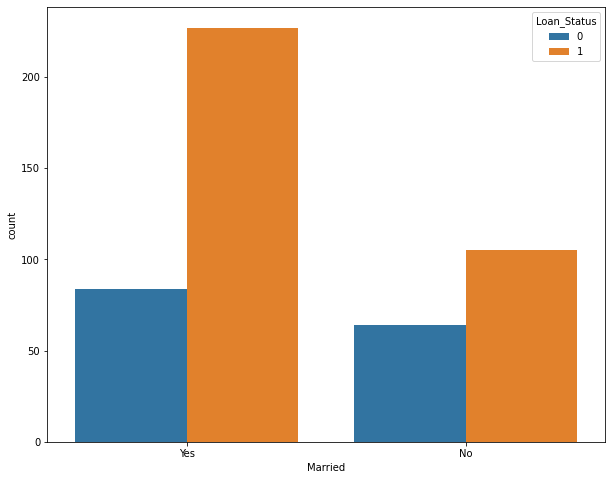

In [22]:
                                                       # Data Visualization

# Visualization for Married vs Loan_status
plt.figure(figsize = (10,8))
sns.countplot(x = df["Married"],hue = df["Loan_Status"])

<AxesSubplot:xlabel='Education', ylabel='count'>

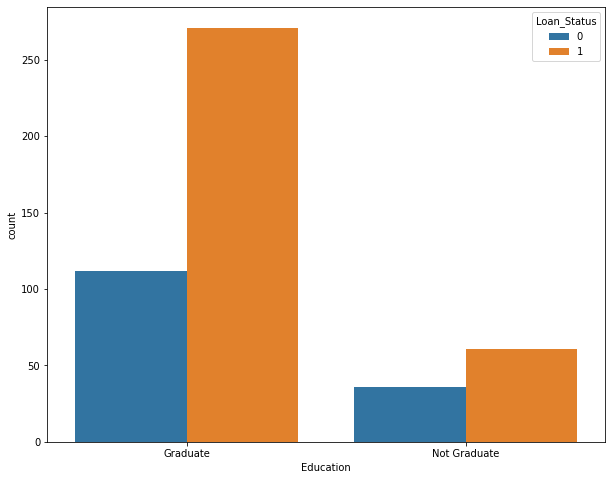

In [23]:
# Visualization for Education vs Loan_status
plt.figure(figsize = (10,8))
sns.countplot(x= df["Education"],hue = df["Loan_Status"])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

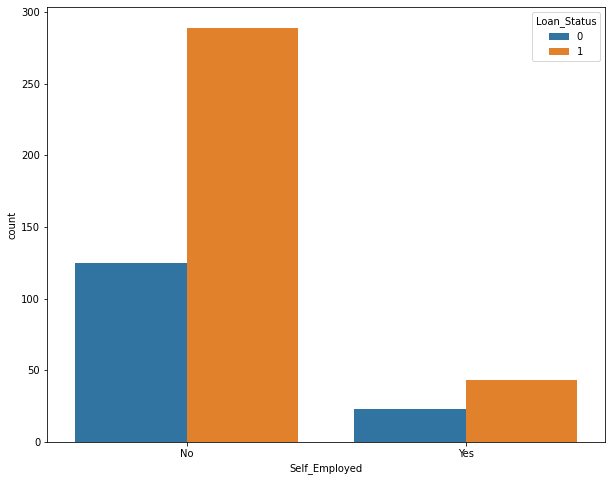

In [24]:
# # Visualization for Employment vs Loan_status
plt.figure(figsize = (10,8))
sns.countplot(x=df["Self_Employed"],hue = df["Loan_Status"])

In [25]:
#Changing the data from  Categorical data to Numerical data 
df.replace({"Married":{"Yes" : 1 , "No":0},"Education" : {"Graduate" : 1 ,"Not Graduate":0},"Self_Employed": { "No" : 0,"Yes":1},
            "Gender": {"Male" :1 ,"Female":0},"Property_Area" : {"Rural":0,"Urban":1,"Semiurban":2}},inplace =True)

In [26]:
# Seperating the data for Trainig the data 
x =  df.drop(columns = ["Loan_ID","Loan_Status"],axis = 1)
y = df["Loan_Status"]

In [27]:
# Splitting the data into training and testing data 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)


In [28]:
# Training the Model 

svc = SVC(kernel="linear")

In [29]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [30]:
x_train_prediction = svc.predict(x_train)

In [31]:
accuracy_score(x_train_prediction,y_train)

0.7708333333333334

In [32]:
x_test_pr = svc.predict(x_test)

In [33]:
accuracy_score(x_test_pr,y_test)

0.8125

In [34]:
import pickle
filename = "Loan_prediction.sav"
pickle.dump(svc, open(filename, "wb"))

In [35]:
load_model = pickle.load(open(filename, "rb"))

In [36]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1


In [37]:
load_model.predict([[1,1,0,1,1,3000,0,66,360,1,1]])

array([1], dtype=int64)

In [ ]:
for _ in range(1):
    Gender = input("Please Type the Gender(If MALE Enter 1 otherwise 0 :    ")
    Married = input("Please type Whether You are married or not(If married Enter 1 othereise 0) ")
    Dependents = input(" How many Dependents Do you have 0/1/2/4(if 3+ enter 4 ) : ")
    Education = input("If graduated press 1 other wise 0 :  " )
    Self_Employed= input("If self-employed press 1 otherwise 0: ") 
    ApplicantIncome = input("Enter your Income in $: " )
    coapplicant = input("Co applicant income if any in $ : ") 
    LoanAmount = input("Loan amount in 1000 $ :  " )
    Loan_Amount_Term = input("Loan amount term( like 180/360/480/: ")
    credit_histroy = input("Credit Histroy if any : ")
    Property_Area = input(" Where is Area in Rural/SemiUrban/Urban: ")
    data = { "Gender" : [Gender],
            "Married" : [Married],
            "Dependents" :[Dependents],
            "Education" : [Education],
            "Self_Employed" : [Self_Employed],
            "ApplicantIncome" :[ApplicantIncome],
            "CoapplicantIncome" : [coapplicant],
            "LoanAmount" : [LoanAmount],
            "Loan_Amount_Term" : [Loan_Amount_Term],
            "Credit_History" : [credit_histroy],
            "Property_Area" : [Property_Area]
           } 
    a  = pd.DataFrame(data)
    a_predict = svc.predict(a)
    if a_predict[0] == 1 :
        print("Loan approved")
        
    else:
        print("Loan Not Approved")
        print(a_predict[0])